In [417]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, balanced_accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Import data sets

In [418]:
data_path = os.getcwd() + "/Datasets/"
fig_path = os.getcwd() + "/Figures/"

## Feature data set

In [454]:
# #### TO DO ####
# # deal with faulty lines (multiple Uniprot IDs)

# brain_all = pd.read_csv(os.getcwd() + "/Motif_discovery/Brain_all.txt", header=None, error_bad_lines=False)
# CSF_neg = pd.read_csv(os.getcwd() + "/Motif_discovery/Brain_CSF_negative_all.txt", header=None, error_bad_lines=False)
# CSF_pos = pd.read_csv(os.getcwd() + "/Motif_discovery/Brain_CSF_positive_all.txt", header=None, error_bad_lines=False)
df_features = pd.read_csv(data_path + "/Features/df_features.csv")
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Lysosome/Vacuole,Nucleus,Cell_membrane,Endoplasmic_reticulum,Mitochondrion,Golgi_apparatus,Peroxisome,Plastid,Signal peptide,CSF
0,Q8TDC3,MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...,778,85085.7493,0.051414,0.012853,0.043702,0.065553,0.029563,0.092545,...,0,0,0,0,0,0,0,0,0,1
1,P48065,MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...,614,69367.5176,0.052117,0.037459,0.030945,0.043974,0.083062,0.081433,...,0,0,1,0,0,0,0,0,0,-1
2,Q9Y250,MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...,596,66612.1565,0.060403,0.011745,0.041946,0.104027,0.023490,0.072148,...,0,0,0,0,0,0,0,0,0,-1
3,P0DMW5,MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...,78,8388.8176,0.230769,0.012821,0.012821,0.012821,0.064103,0.051282,...,0,0,0,0,1,0,0,0,0,-1
4,P21579,MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...,422,47572.5391,0.063981,0.014218,0.061611,0.082938,0.045024,0.059242,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q8IZU8,MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...,1212,139235.8716,0.067657,0.009076,0.045380,0.048680,0.063531,0.055281,...,0,0,1,0,0,0,0,0,1,-1
2538,Q4JDL3,MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...,420,48422.3273,0.047619,0.019048,0.057143,0.083333,0.052381,0.045238,...,0,0,0,0,0,0,0,0,0,-1
2539,Q8N4V2,MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...,548,60768.4670,0.085766,0.023723,0.031022,0.062044,0.056569,0.082117,...,1,0,0,0,0,0,0,0,0,-1
2540,P48426,MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...,406,46224.0440,0.056650,0.009852,0.068966,0.073892,0.046798,0.051724,...,0,1,0,0,0,0,0,0,0,-1


## Curated CSF 1000+ proteins data set

In [420]:
csf = pd.read_csv(data_path + "CSF/all_csf_1000plus.csv")
csf

,Uniprot,#Peptides_Macron2018A,#Peptides_Macron2020,#Peptides_Zhang2015,#Peptides_Guldbrandsen2014,#Peptides_Macron2018B,#Peptides_Schutzer2010,#Peptides_Pan2007
0,Q6K0P9,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Q9GZZ8,1.0,3.0,NaN,NaN,NaN,NaN,NaN
2,P09529,3.0,3.0,4.0,4.0,1.0,NaN,NaN
3,P61019,2.0,3.0,NaN,NaN,2.0,NaN,NaN
4,Q9GZX9,4.0,4.0,3.0,3.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...
5719,Q9ULJ1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5720,Q9BTA9,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5721,Q86VF7,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5722,Q8NDV3,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Brain proteome (HPA)

In [421]:
brain_elevated = pd.read_csv(data_path + "Brain/HPA_all_brain_elevated_version21.tsv", sep="\t")
print("Number of brain elevated proteins according to the HPA: %i" % len(brain_elevated))
brain_elevated.dropna(subset=["Uniprot"], inplace=True)
brain_elevated.drop_duplicates(subset=["Uniprot"], inplace=True)
print("Number of brain elevated proteins with a Uniprot ID: %i" % len(brain_elevated))

Number of brain elevated proteins according to the HPA: 2709
Number of brain elevated proteins with a Uniprot ID: 2546


In [444]:
brain_detected = pd.read_csv(data_path + "Brain/HPA_all_brain_detected_version21.tsv", sep="\t", low_memory=False)
print("Number of brain detected proteins according to the HPA: %i" % len(brain_detected))
brain_detected.dropna(subset=["Uniprot"], inplace=True)
brain_detected.drop_duplicates(subset=["Uniprot"], inplace=True)
print("Number of brain detected proteins with a Uniprot ID: %i" % len(brain_detected))

Number of brain detected proteins according to the HPA: 16507
Number of brain detected proteins with a Uniprot ID: 16021


In [423]:
only_brain = pd.read_csv(data_path + "Brain/HPA_only_brain_detected_version21.tsv", sep="\t")
print("Number of only brain detected proteins according to the HPA: %i" % len(only_brain))
only_brain.dropna(subset=["Uniprot"], inplace=True)
only_brain.drop_duplicates(subset=["Uniprot"], inplace=True)
print("Number of only brain detected proteins with a Uniprot ID: %i" % len(only_brain))

Number of only brain detected proteins according to the HPA: 204
Number of only brain detected proteins with a Uniprot ID: 169


In [424]:
def keep_first_uniprot(string):
    if "," in string:
        uniprots = string.split(",")
        uniprot1 = uniprots[0]
    else:
        uniprot1 = string
    
    return uniprot1

## Data overlap

In [425]:
brain_set = set(brain_elevated["Uniprot"])
brain_detected_set = set(brain_detected["Uniprot"])
only_brain_set = set(only_brain["Uniprot"])
csf_set = set(csf["Uniprot"])
hp_set = set(df_features["Uniprot"])

# Machine Learning

## Create training and test set

In [426]:
feature_df_brain = df_features.merge(brain_elevated["Uniprot"], on="Uniprot", how="inner")
# feature_df_brain["id"].is_unique
feature_df_brain

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Lysosome/Vacuole,Nucleus,Cell_membrane,Endoplasmic_reticulum,Mitochondrion,Golgi_apparatus,Peroxisome,Plastid,Signal peptide,CSF
0,Q8TDC3,MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...,778,85085.7493,0.051414,0.012853,0.043702,0.065553,0.029563,0.092545,...,0,0,0,0,0,0,0,0,0,1
1,P48065,MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...,614,69367.5176,0.052117,0.037459,0.030945,0.043974,0.083062,0.081433,...,0,0,1,0,0,0,0,0,0,-1
2,Q9Y250,MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...,596,66612.1565,0.060403,0.011745,0.041946,0.104027,0.023490,0.072148,...,0,0,0,0,0,0,0,0,0,-1
3,P0DMW5,MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...,78,8388.8176,0.230769,0.012821,0.012821,0.012821,0.064103,0.051282,...,0,0,0,0,1,0,0,0,0,-1
4,P21579,MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...,422,47572.5391,0.063981,0.014218,0.061611,0.082938,0.045024,0.059242,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q8IZU8,MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...,1212,139235.8716,0.067657,0.009076,0.045380,0.048680,0.063531,0.055281,...,0,0,1,0,0,0,0,0,1,-1
2538,Q4JDL3,MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...,420,48422.3273,0.047619,0.019048,0.057143,0.083333,0.052381,0.045238,...,0,0,0,0,0,0,0,0,0,-1
2539,Q8N4V2,MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...,548,60768.4670,0.085766,0.023723,0.031022,0.062044,0.056569,0.082117,...,1,0,0,0,0,0,0,0,0,-1
2540,P48426,MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...,406,46224.0440,0.056650,0.009852,0.068966,0.073892,0.046798,0.051724,...,0,1,0,0,0,0,0,0,0,-1


In [429]:
# define explanatory and response variables
X = (feature_df_brain.drop(["Uniprot", "Sequence", "CSF"], axis=1))
y = (feature_df_brain["CSF"])

# split 80% training and 20% test 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Model training

In [430]:
# train the model
rf = RandomForestClassifier(random_state=0, n_estimators=1000) 
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [433]:
# predict on test set
y_pred = rf.predict(test_X)

In [ ]:
# save model
#### TO DO ####

## Model evaluation

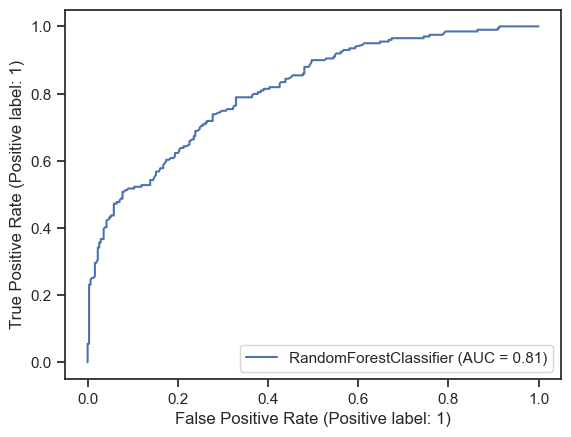

In [431]:
RocCurveDisplay.from_estimator(rf, test_X, test_y)
plt.show()

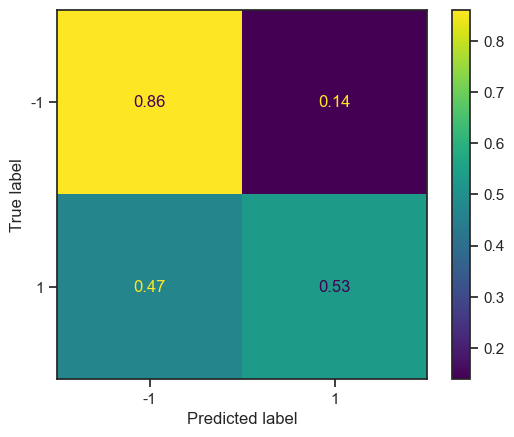

In [432]:
ConfusionMatrixDisplay.from_estimator(rf, test_X, test_y, normalize="true")
plt.show()

In [446]:
print("Balanced accuracy:", balanced_accuracy_score(test_y, y_pred))

Balanced accuracy: 0.6969768195817798


In [447]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.86      0.80       310
           1       0.71      0.53      0.61       199

    accuracy                           0.73       509
   macro avg       0.73      0.70      0.70       509
weighted avg       0.73      0.73      0.72       509



## Feature importance

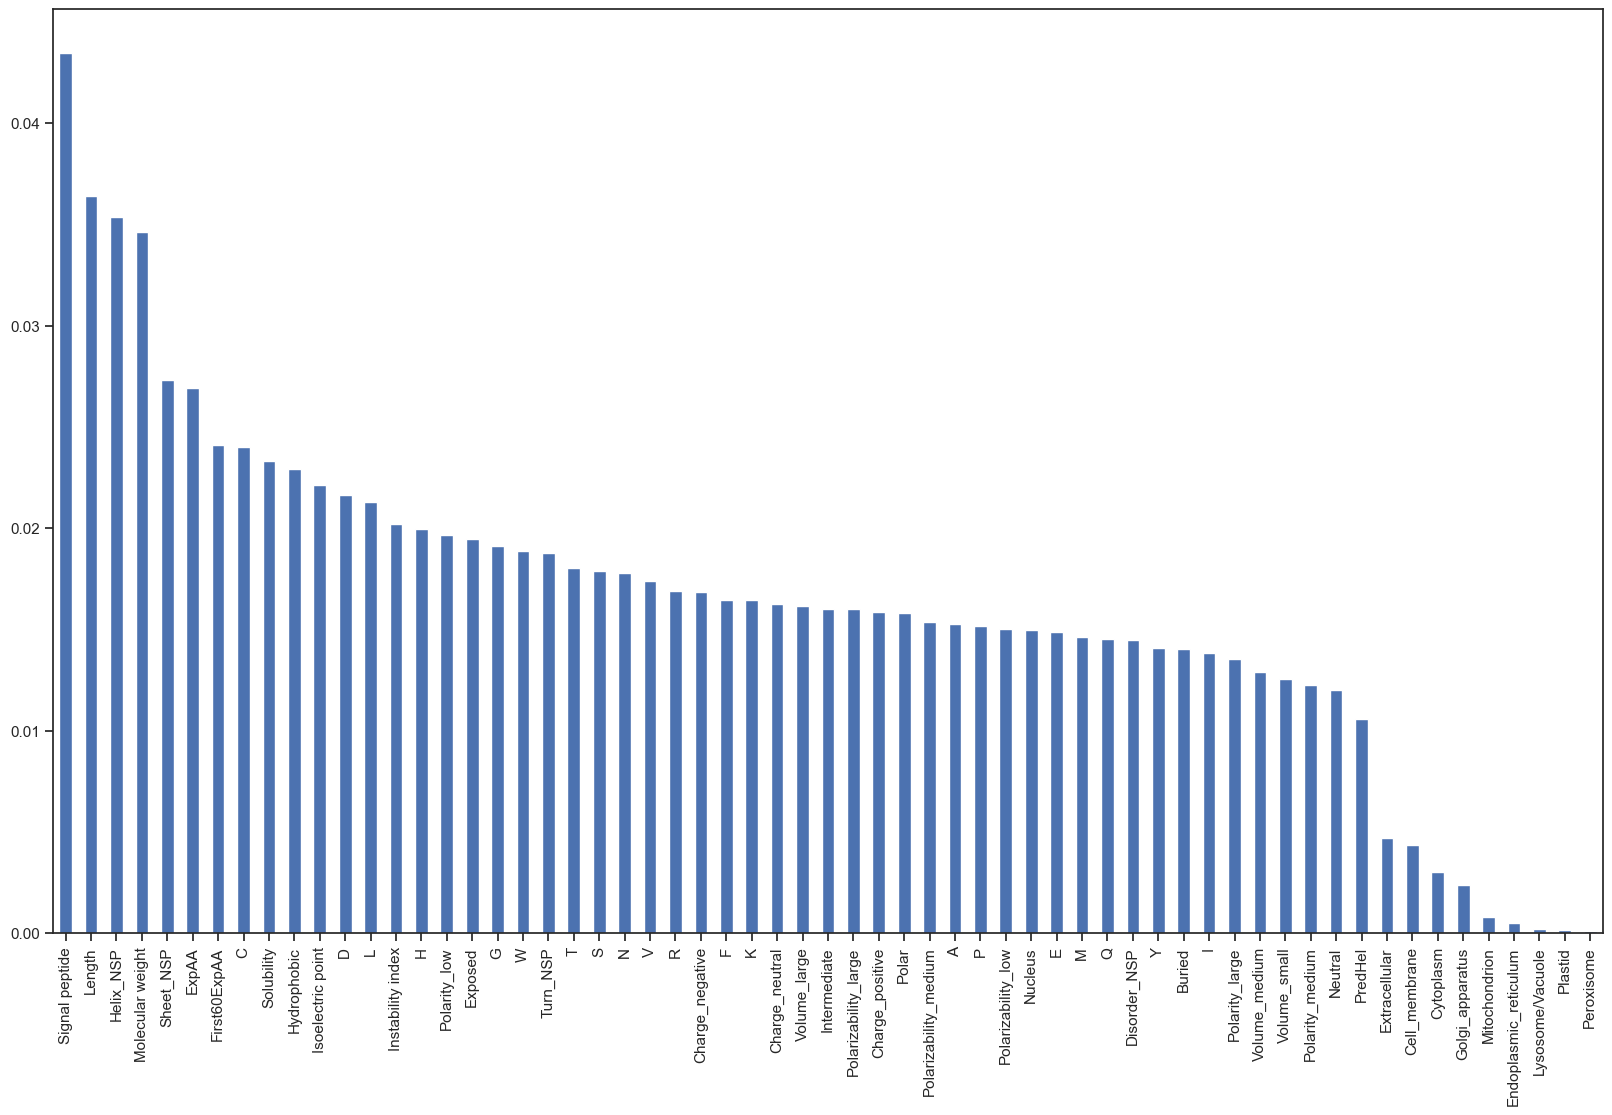

In [438]:
feature_importance = pd.Series(index = train_X.columns, data = rf.feature_importances_)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(20,12))
plt.show()

# Prediction on brain detected data set

## Create test data set

In [453]:
brain_detected_test_set = brain_detected_set - brain_set
len(brain_detected_test_set)

# df_features_test = 

df_features[df_features["Uniprot"].isin(list(brain_detected_test_set))]
# df_features_test

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Lysosome/Vacuole,Nucleus,Cell_membrane,Endoplasmic_reticulum,Mitochondrion,Golgi_apparatus,Peroxisome,Plastid,Signal peptide,CSF


In [450]:
test_brain = df_features_test.drop(["Uniprot", "Sequence"], axis=1)
test_preds = pd.Series(rf.predict(test_brain))

KeyError: "['Sequence'] not found in axis"

In [ ]:
test_preds.value_counts(dropna=False)

In [ ]:
test_preds.index = test_brain.index
test_brain_pos = test_brain[test_preds == 1]
test_brain_neg = test_brain[test_preds == -1]

In [ ]:
test_brain_pos.columns

In [ ]:
test_brain_pos.describe()[['Prob. of Solubility', 'Aggregation_propensity', 'Aromaticity',
       'Instability_index', 'Gravy', 'isoelectric_point', 'charge_at_7',
       'charge_at_5', 'HSP', 'PTM_UP', 'Citrullination_UP', 'GPI-anchor_UP',
       'Lipoprotein_UP', 'Nitration_UP', 'Prenylation_UP', 'ISGylation_UP',
       'NEDDylation_UP', 'Acetylation_all', 'Glycosylation_all',
       'Methylation_all', 'Myristoylation_all', 'Nitrosylation_all',
       'Palmitoylation_all', 'Phosphorylation_all', 'SUMOylation_all',
       'Ubiquitination_all']]

In [ ]:
test_brain_neg.describe()[['Prob. of Solubility', 'Aggregation_propensity', 'Aromaticity',
       'Instability_index', 'Gravy', 'isoelectric_point', 'charge_at_7',
       'charge_at_5', 'HSP', 'PTM_UP', 'Citrullination_UP', 'GPI-anchor_UP',
       'Lipoprotein_UP', 'Nitration_UP', 'Prenylation_UP', 'ISGylation_UP',
       'NEDDylation_UP', 'Acetylation_all', 'Glycosylation_all',
       'Methylation_all', 'Myristoylation_all', 'Nitrosylation_all',
       'Palmitoylation_all', 'Phosphorylation_all', 'SUMOylation_all',
       'Ubiquitination_all']]

In [ ]:
test_proba = pd.DataFrame(rf.predict_proba(test_brain), columns=["not CSF", "CSF"])
test_proba.sort_values(by="not CSF")
test_proba

In [ ]:
rf.classes_

In [ ]:
test_proba.index = test_brain.index
test_proba

In [ ]:
feature_df_test[["not CSF", "CSF"]] = test_proba
feature_df_test

In [ ]:
feature_df_test.sort_values(by="CSF", ascending=False)[:30]

In [ ]:
feature_df_test.sort_values(by="not CSF", ascending=False)[:30]

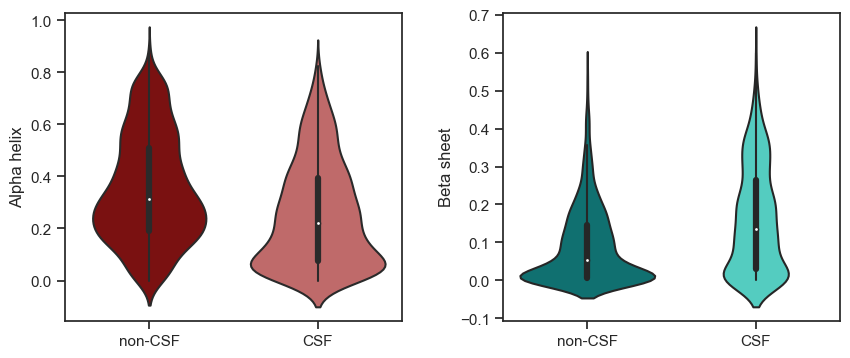

In [428]:
sns.set(style=("ticks"), font_scale=1)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.3)#, hspace=None)

sns.violinplot(y="Helix_NSP",  x="CSF", data=feature_df_brain, ax=axes[0], palette=["darkred", "indianred"])
axes[0].set(xlabel=None, ylabel="Alpha helix", xticklabels=["non-CSF", "CSF"])
sns.violinplot(y="Sheet_NSP",  x="CSF", data=feature_df_brain, ax=axes[1], palette=["teal", "turquoise"])
axes[1].set(xlabel=None, ylabel="Beta sheet", xticklabels=["non-CSF", "CSF"])

plt.show()